In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
df = pd.read_excel('superstore.xls')

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
furniture = df[df['Category']=='Furniture']

In [8]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
furniture['Order ID'].min(), furniture['Order ID'].max()

('CA-2014-100090', 'US-2017-169551')

In [10]:
furniture_m = furniture.copy()

In [11]:
col = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

In [12]:
furniture_s = furniture_m[['Order Date', 'Sales']]

In [13]:
furniture_s.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [14]:
furniture_s = furniture_s.sort_values('Order Date')

In [15]:
furniture_s

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [16]:
furniture_s = furniture_s.groupby('Order Date')['Sales'].sum().reset_index()

In [17]:
furniture_s

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [18]:
## indexing with time series data:
furniture_s = furniture.set_index('Order Date')

In [19]:
furniture_s.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [20]:
y = furniture_s['Sales'].resample('MS').mean()

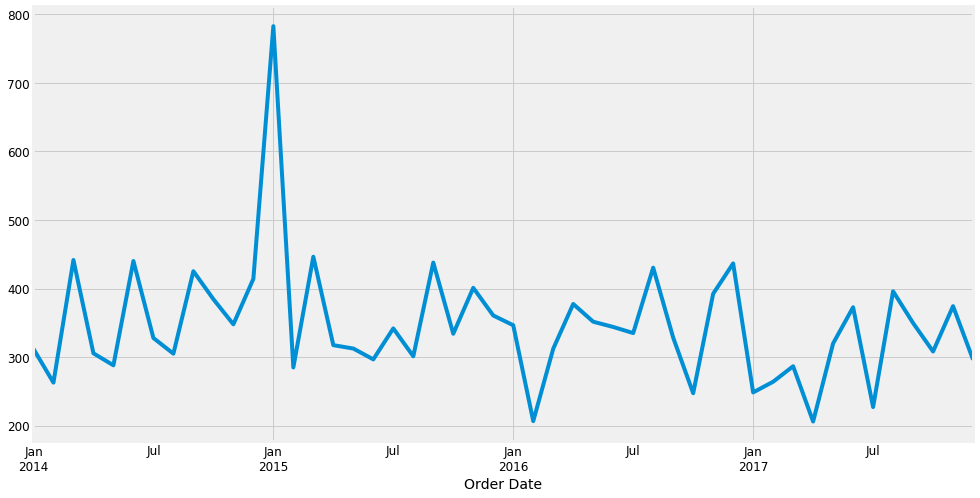

In [21]:
y.plot(figsize = (15, 8))

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [23]:
decomposition = sm.tsa.seasonal_decompose(y, model ='additive')

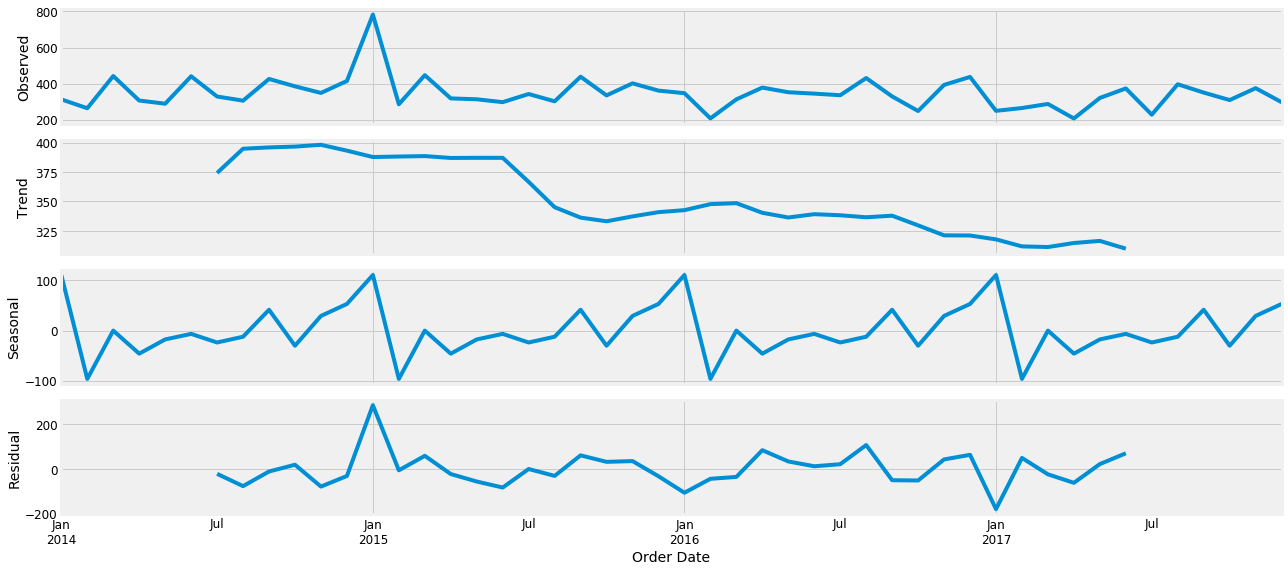

In [24]:
fig = decomposition.plot()
plt.show()

In [25]:
import itertools

In [30]:
## time series forecasting with ARIMA - Autoregressive Integrated Moving Average.

p = d = q = range(0,2) 
# ARIMA(p, d, q) are three parameters acount for seasonality, trend, and noise in ARIMA
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
               for x in list(itertools.product(p, d, q))] 

In [31]:
print('Example of parameter comninations for seasonal ARIMA')
print('\n')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[3], seasonal_pdq[4]))

Example of parameter comninations for seasonal ARIMA


SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 1) X (1, 0, 0, 12)


In [35]:
# parameter selection:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, 
                                        order = param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity = False,
                                        enforce_invertibility = False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)) 
    except:
        continue


In [151]:
## fit the model
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1, 1, 1),
                               seasonal_order = (1, 1, 0, 12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

In [152]:
results = mod.fit()

In [153]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


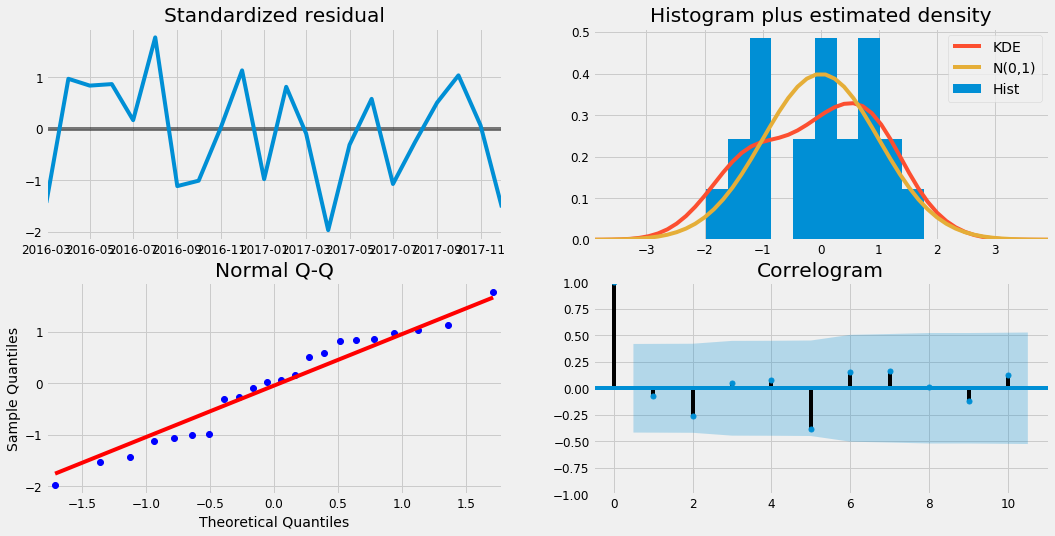

In [155]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [156]:
# validating forecasts

pred = results.get_prediction(start = pd.to_datetime('2017-01-01'),
                              dynamic = False)
pred_ci = pred.conf_int()

<function matplotlib.pyplot.show(*args, **kw)>

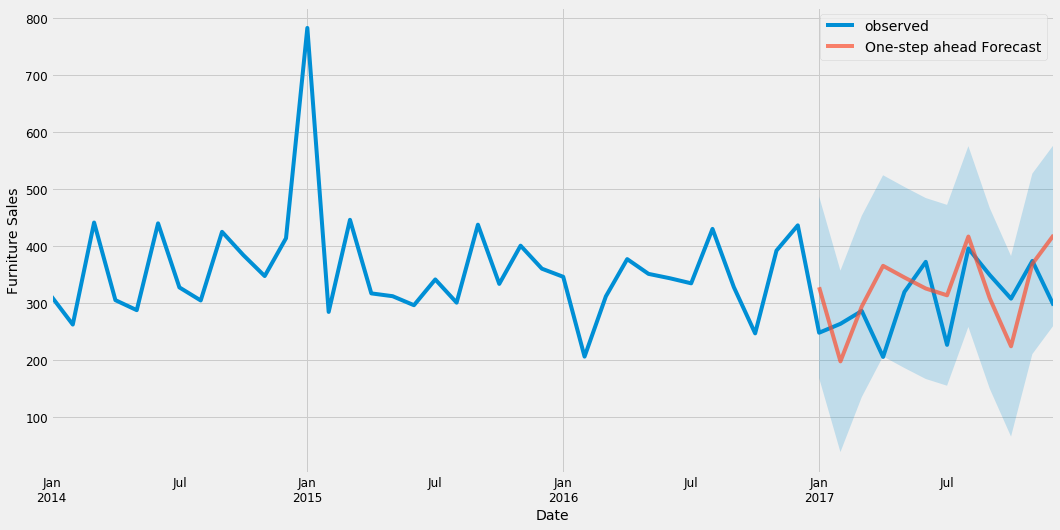

In [163]:
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label = 'One-step ahead Forecast',
                        alpha=.7, figsize=(16, 8))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
                alpha = .2
               )

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show

In [171]:
import math

In [172]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = (((y_predicted - y_true)**2).mean())
print(f"The Mean Squared Error of the model is {round(mse, 2)}")
print('\n')
print(f"The Root Mean Squared Error of the model is {round(math.sqrt(mse), 2)}")

The Mean Squared Error of the model is 5911.26


The Root Mean Squared Error of the model is 76.88


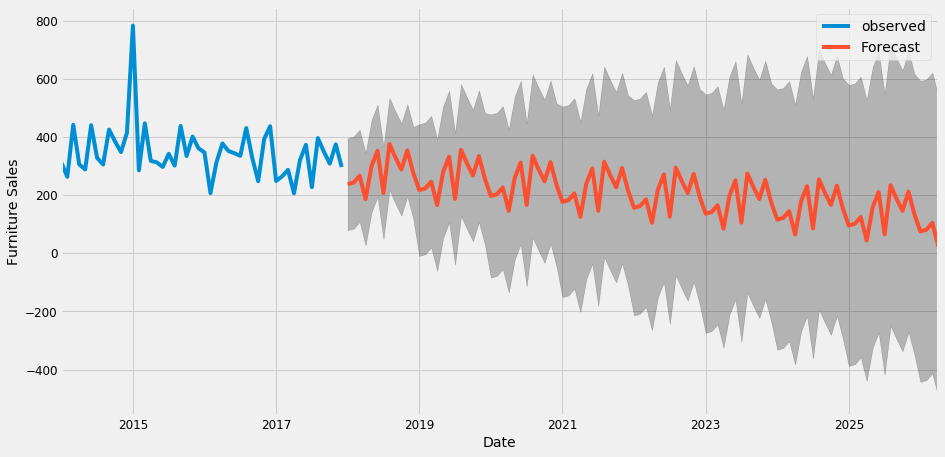

In [173]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()